<a href="https://colab.research.google.com/github/Nnk7/AWS/blob/main/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [ ]:
!mamba install -q gdal=3.4.1

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [2]:
from osgeo import gdal #Tools used for processing geospatial data.
gdal.VersionInfo()

'3040300'

In [3]:
import os # To establish the interaction between the user and the operating system
import numpy as np #To work with arrays and perform a wide variety of mathematical
from matplotlib import pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
path = '/content/drive/MyDrive/LC08_L2SP_043035_20220621_20220705_02_T1_SR_B2.TIF'

In [10]:
ds = gdal.Open(path).ReadAsArray().astype(float) #Reading and storing DN values as
ds.shape #check the dimension of ds

(7741, 7611)

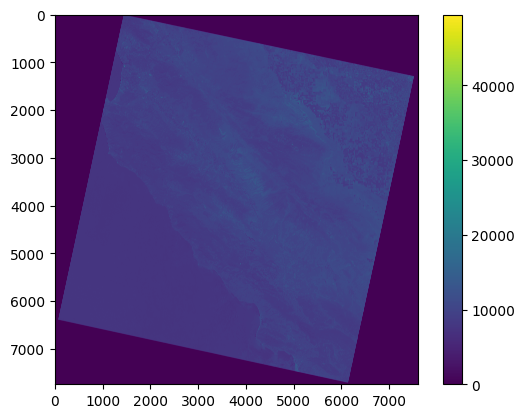

In [11]:
plt.imshow(ds)
plt.colorbar()

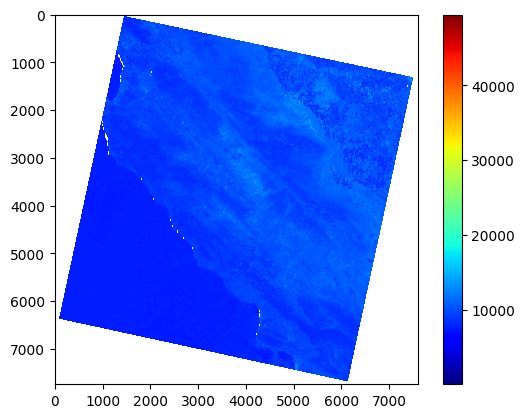

In [12]:
ds[ds == 0] = np.nan #Setting zero values as nan and then plotting DN values
plt.imshow(ds,cmap='jet')
plt.colorbar()

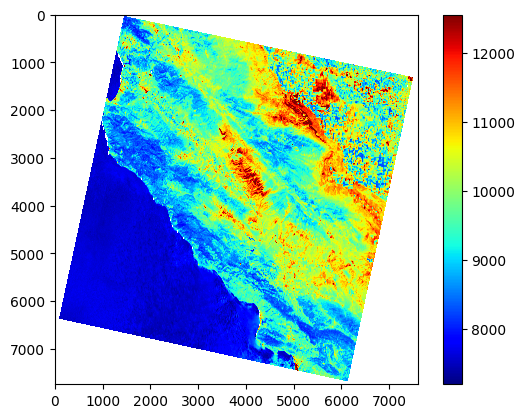

In [ ]:
vmin = np.nanquantile(ds, 0.01) #Calculating vmin and vmax values to enhance the im
vmax = np.nanquantile(ds, 0.99)
plt.imshow(ds, vmin=vmin, vmax=vmax, cmap='jet') #Streaching image from vmin to vma
plt.colorbar()

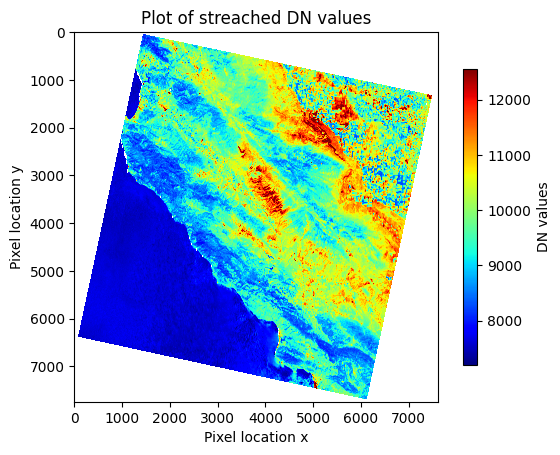

In [13]:
vmin = np.nanquantile(ds, 0.01) #Calculating vmin and vmax
vmax = np.nanquantile(ds, 0.99)
plt.imshow(ds, vmin=vmin, vmax=vmax, cmap='jet') #Streaching image from vmin to vma
plt.colorbar(label='DN values', orientation="vertical",shrink=0.8,pad=0.05) #Settin
plt.title('Plot of streached DN values') #Adding plot title
plt.xlabel("Pixel location x") #Adding x label
plt.ylabel("Pixel location y") #Adding y label
plt.show()

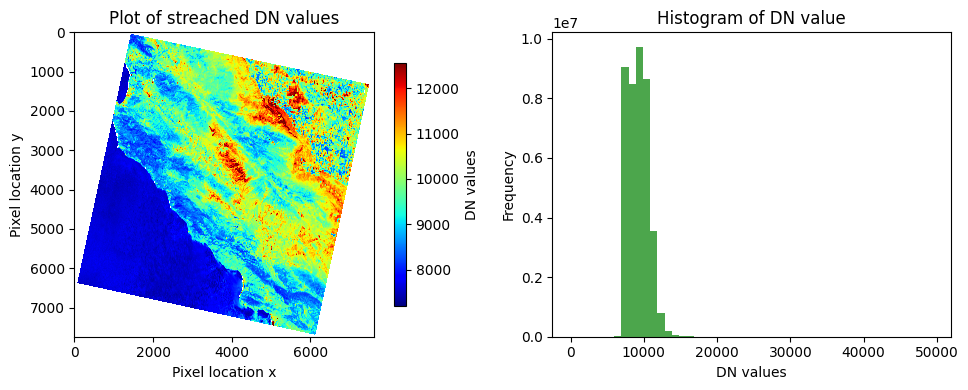

In [19]:
vmin = np.nanquantile(ds, 0.01) #Calculating vmin and vmax
vmax = np.nanquantile(ds, 0.99)
plt.figure(figsize=(10,4))
# Creating the image plot
plt.subplot(1,2,1) #creating a 1x2 grid of plots, this is the first plot
plt.imshow(ds, vmin=vmin, vmax=vmax, cmap='jet') #Streaching image from vmin to vma
plt.colorbar(label='DN values', orientation="vertical",shrink=0.8,pad=0.05) #Settin
plt.title('Plot of streached DN values') #Adding plot title
plt.xlabel("Pixel location x") #Adding x label
plt.ylabel("Pixel location y") #Adding y label

# creating the histogram
plt.subplot(1, 2, 2)  #second plot in the 1x2 grid
hist, bins, _ = plt.hist(ds[~np.isnan(ds)], bins=50, color='green', alpha=0.7)
plt.xlabel("DN values")
plt.ylabel('Frequency')
plt.title('Histogram of DN value')

plt.tight_layout()
plt.show()